# DataCamp (Python)

##  Feature Engineering for Machine Learning in Python                 


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Feature Engineering for Machine Learning in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##    CHAPTER 1  - Creating Features


#### Exercício 1 - Why generate features?

In [4]:
# %%script false
#vídeo

df = pd.read_csv(data_folder + "Combined_DS_v10.csv")

# Feature Engineering

# Different types of data
#  - Continuous: either integers (or whole numbers) or oats (decimals)
#  - Categorical: one of a limited set of values, e.g. gender, country of birth
#  - Ordinal: ranked values, often with no detail of distance between them
#  - Boolean: True/False values
#  - Datetime: dates and times

# Pandas

# Dataset

# Column names
df.columns

# Column types
df.dtypes

# Selecting specic data types
only_ints = df.select_dtypes(include=['int64'])  # tem que se pôr 64 senão n dá
print(only_ints.columns)


Index(['Age', 'Years Experience'], dtype='object')


Exercício 2

In [5]:
# Getting to know your data

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(data_folder + "Combined_DS_v10.csv")

# Print the data type of each column
print(so_survey_df.dtypes)

# Print the first five rows of the DataFrame
so_survey_df.head()

# Question - What type of data is the ConvertedSalary column? --> float64, numeric

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


Exercício 3

In [6]:
# Selecting specific data types

# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int64', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)


Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


#### Exercício 4 - Dealing with categorical variables

In [7]:
#vídeo

# Encoding categorical features
#  - One-hot encoding
#  - Dummy encoding

# One-hot encoding
pd.get_dummies(df, columns=['Country'], prefix='C')

# Dummy encoding
pd.get_dummies(df, columns=['Country'], drop_first=True, prefix='C').head()

# One-hot vs. dummies
#  - One-hot encoding: Explainable features
#  - Dummy encoding: Necessary information without duplication

# Limiting your columns
counts = df['Country'].value_counts()
print(counts, "\n")

mask = df['Country'].isin(counts[counts < 5].index)

df['Country'][mask] = 'Other'

print(pd.value_counts(counts))


South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64 

95     2
119    1
9      1
134    1
166    1
5      1
164    1
115    1
97     1
Name: Country, dtype: int64


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Exercício 5

In [8]:
# One-hot encoding and dummy variables

# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print("\n", dummy.columns)


Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')

 Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


Exercício 6

In [9]:
# Dealing with uncommon categories

# Create a series out of the Country column
countries = so_survey_df.Country

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts, "\n")

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Print the top 5 rows in the mask series
print(mask.head(), "\n")

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())


South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64 

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool 

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Other            14
Name: Country, dtype: int64


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Exercício 7 - Numeric variables

In [10]:
%%script false
#vídeo

# Types of numeric features

# Does size matter?

# Binarizing numeric variables
df['Binary_Violation'] = 0

df.loc[df['Number_of_Violations'] > 0, 'Binary_Violation'] = 1


# --> Binning numeric variables
import numpy as np

df['Binned_Group'] = pd.cut(df['Number_of_Violations'], bins=[-np.inf, 0, 2, np.inf], labels=[1, 2, 3]
                            
                            # all values between -infinity and 0 are labeled as 1
                            # all values 1 and 2 are labeled as 2
                            # all values between 3 and +infinity are labeled as 3


Couldn't find program: 'false'


Exercício 8

In [11]:
# Binarizing columns

# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
so_survey_df[['Paid_Job', 'ConvertedSalary']].head()


# Binarizing columns can also be useful for your target variables.

,Paid_Job,ConvertedSalary
0,0,NaN
1,1,70841.0
2,0,NaN
3,1,21426.0
4,1,41671.0


Exercício 9

In [12]:
# Binning values

# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head(), "\n")

###################################################################################
print("====================================================================================")

# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
so_survey_df[['boundary_binned', 'ConvertedSalary']].head(8)


          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0 



,boundary_binned,ConvertedSalary
0,NaN,NaN
1,Medium,70841.0
2,NaN,NaN
3,Low,21426.0
4,Low,41671.0
5,High,120000.0
6,NaN,NaN
7,Very high,250000.0


# CHAPTER 2 - Dealing with Messy Data

#### Exercício 1 - Why do missing values exist

In [13]:
#vídeo

# How gaps in data occur
#  - Data not being collected properly
#  - Collection and management errors
#  - Data intentionally being omitted
#  - Could be created due to transformations ofthe data

# Why we care?
#  - Some models cannot work with missing data (Nulls/NaNs)
#  - Missing data may be a sign of a wider data issue
#  - Missing data can be a useful feature

# Missing value discovery
df.info()

# Finding missing values
df.isnull()
df['StackOverflowJobsRecommend'].isnull().sum()

# Finding non-missing values
df.notnull().head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
SurveyDate                    999 non-null object
FormalEducation               999 non-null object
ConvertedSalary               665 non-null float64
Hobby                         999 non-null object
Country                       999 non-null object
StackOverflowJobsRecommend    487 non-null float64
VersionControl                999 non-null object
Age                           999 non-null int64
Years Experience              999 non-null int64
Gender                        693 non-null object
RawSalary                     665 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 85.9+ KB


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,True,True,False,True,True,False,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,True,True,True,True,True,False,False
3,True,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


Exercício 2

In [14]:
# How sparse is my data?

# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

# there are 693 non-missing entries in the Gender column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Age       999 non-null int64
Gender    693 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


Exercício 3

In [15]:
# Finding the missing values

# Print the locations of the missing values of the first 10 entries
print("locations of the missing values:\n", sub_df.head(10).isnull())

print("===========================================")

# Print the locations of the non-missing values
print("locations of the non-missing values:\n", sub_df.head(10).notnull())


locations of the missing values:
      Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True
locations of the non-missing values:
     Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


#### Exercício 4 - Dealing with missing values (I)

In [16]:
#vídeo

# Listwise deletion

# Drop all rows with at least one missing values
df.dropna(how='any')

# Drop rows with missing values in a specific column
df.dropna(subset=['VersionControl'])

# Issues with deletion
#  - It deletes valid data points
#  - Relies on randomness
#  - Reduces information


# Replacing with strings
# Replace missing values in a specific column with a given string
df['VersionControl'].fillna(value='None Given', inplace=True)


# Recording missing values
# Record where the values are not missing
df['SalaryGiven'] = df['ConvertedSalary'].notnull()

# Drop a specific column
df.drop(columns=['ConvertedSalary'])

print("")


Exercício 5

In [17]:
# Listwise deletion

# Print the number of rows and columns
print(so_survey_df.shape)

# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

############################################

# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

##########################################

# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)


# dropping all rows that contain any missing values may greatly reduce the size of your dataset. So you need to think 
# carefully and consider several trade-offs when deleting missing values.

(999, 14)
(264, 14)
(999, 8)
(693, 14)


Exercício 6

In [18]:
# Replacing missing values with constants

# Print the count of occurrences
print(so_survey_df['Gender'].value_counts(), "\n")

##########

# Replace missing values
so_survey_df['Gender'].fillna('Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())


Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64 

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2

#### Exercício 7 - Dealing with missing values (II)

In [19]:
#vídeo

# Deleting missing values
# Can't delete rows with missing values in the test set

# What else can you do?
#  - Categorical columns: Replace missing values with the most common occurring value or with a string that ags missing 
#    values such as 'None'.
#  - Numeric columns: Replace missing values with a suitable value

# Measures of central tendency - mean, median

# Calculating the measures of central tendency
df['ConvertedSalary'].mean()
df['ConvertedSalary'].median()

# Fill the missing values
df['ConvertedSalary'] = df['ConvertedSalary'].fillna(df['ConvertedSalary'].mean())

df['ConvertedSalary'] = df['ConvertedSalary'].astype('int64')


# Rounding values
df['ConvertedSalary'] = df['ConvertedSalary'].fillna(round(df['ConvertedSalary'].mean()))


Exercício 8

In [20]:
# Filling continuous missing values

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head(), "\n")

# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
so_survey_df['StackOverflowJobsRecommend'].head()


0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64 

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64

Exercício 9

In [21]:
# Imputing values in predictive models

# When working with predictive models you will often have a separate train and test DataFrames. In these cases you want 
# to ensure no information from your test set leaks into your train set. When filling missing values in data to be used in
# these situations how should approach the two data sets?

print("""Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test 
sets.""")

Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test 
sets.


#### Exercício 10 - Dealing with other data issues

In [22]:
#vídeo

# Bad characters
print(df['RawSalary'].dtype, "\n")

print(df['RawSalary'].head(), "\n")

# Dealing with bad characters
df['RawSalary'] = df['RawSalary'].str.replace(',', '')

# df['RawSalary'] = df['RawSalary'].astype(float)  #n dá porque tem outros caracteres, como £. Tem que se fazer:

# Finding other stray characters
coerced_vals = pd.to_numeric(df['RawSalary'], errors='coerce')

df[coerced_vals.isna()].head()

####################################################

# Chaining methods
# df['column_name'] = df['column_name'].method1()
# df['column_name'] = df['column_name'].method2()
# df['column_name'] = df['column_name'].method3()

# # Same as:
# df['column_name'] = df['column_name'].method1().method2().method3()

###################################

object 

0           NaN
1     70,841.00
2           NaN
3     21,426.00
4    £41,671.00
Name: RawSalary, dtype: object 



,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,SalaryGiven
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,South Africa,NaN,Git,21,13,Male,NaN,False
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,No,Sweeden,8.0,Git,45,11,NaN,NaN,False
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671,Yes,UK,8.0,Git,39,7,Male,£41671.00,True
6,5/25/18 6:11,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,UK,NaN,Git,34,11,Male,NaN,False
8,10/7/18 22:14,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,No,South Africa,10.0,Git,23,17,Male,NaN,False


Exercício 11

In [23]:
# Dealing with stray characters (I)

# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# Remove the dollar signs in the column 
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')


Exercício 12

In [24]:
# Dealing with stray characters (II)

# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
so_survey_df['RawSalary'].loc[idx]

#####################

# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')  # tb era preciso as £

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(float)

# Print the column
so_survey_df['RawSalary'].head()


0        NaN
1    70841.0
2        NaN
3    21426.0
4    41671.0
Name: RawSalary, dtype: float64

Exercício 13

In [25]:
%%script false
# Method chaining

# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '').str.replace('$', '').str.replace('£', '')
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(float)

# Print the RawSalary column
print(so_survey_df['RawSalary'])


Couldn't find program: 'false'


# Chapter 3 - Conforming to Statistical Assumptions

#### Exercício 1 - Data distributions

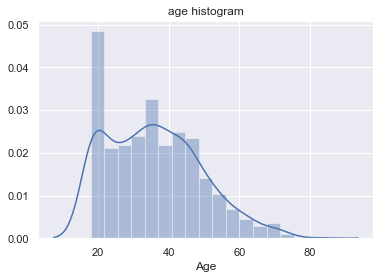

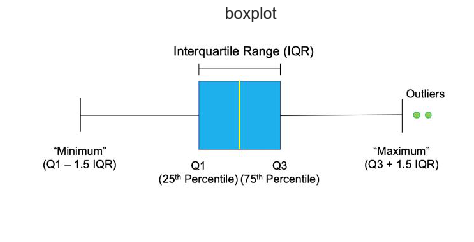

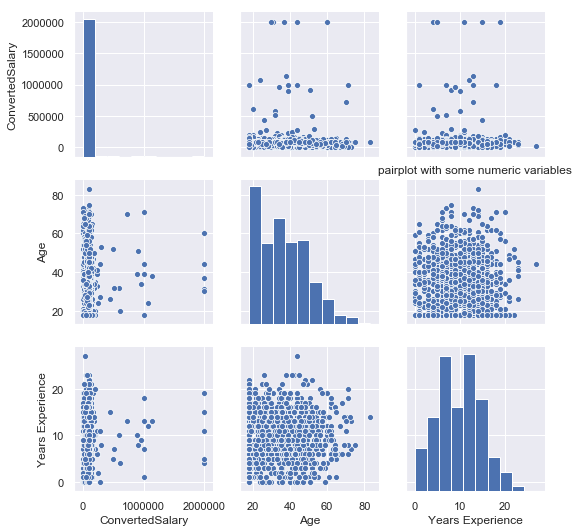

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,normalized_age,standardized_col,log_ConvertedSalary
count,9.990000e+02,487.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,9.256511e+04,7.061602,36.003003,9.961962,0.276969,9.935329e-17,4.698722e-16
std,1.705864e+05,2.621591,13.255127,4.878129,0.203925,1.000501e+00,1.000501e+00
min,0.000000e+00,0.000000,18.000000,0.000000,0.000000,-1.358872e+00,-4.499995e+00
25%,4.164150e+04,5.000000,25.000000,7.000000,0.107692,-8.305099e-01,-4.074688e-01
50%,9.000000e+04,7.000000,35.000000,10.000000,0.261538,-7.570696e-02,3.780847e-01
75%,9.256500e+04,10.000000,45.000000,13.000000,0.415385,6.790960e-01,4.091229e-01
max,2.000000e+06,10.000000,83.000000,27.000000,1.000000,3.547347e+00,5.139988e+00


In [60]:
#vídeo

# Distribution assumptions

# Observing your data
import matplotlib.pyplot as plt
sns.distplot(df.Age)
plt.title("age histogram")
plt.show()

# Delving deeper with box plots
image = plt.imread(data_folder + "boxplot.jpg")
plt.axis('off')
plt.imshow(image)
plt.title("boxplot", fontsize=16)
plt.subplots_adjust(left=0, bottom=-0.2, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Box plots in pandas

# Paring distributions
import seaborn as sns
sns.pairplot(df[['ConvertedSalary', 'Age', 'Years Experience']])
plt.title("pairplot with some numeric variables")
plt.show()

# Further details on your distributions
df.describe()


Exercício 2

In [27]:
so_numeric_df = so_numeric_df.drop('StackOverflowJobsRecommend', axis=1)

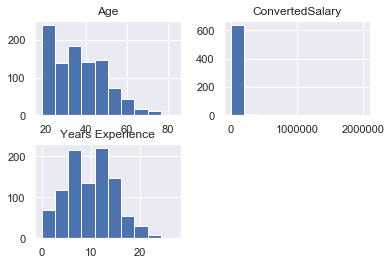

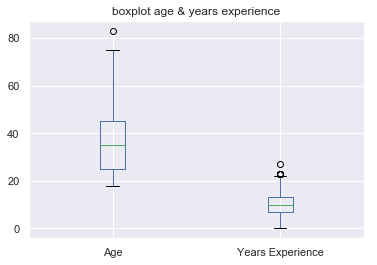

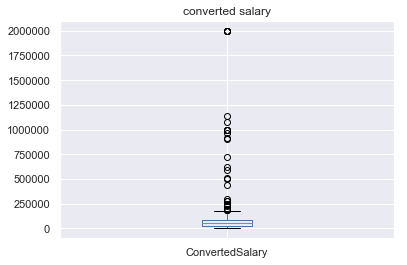

In [28]:
# What does your data look like? (I)

# Create a histogram
so_numeric_df.hist()
plt.title("histogram")

plt.show()

# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.title("boxplot age & years experience")
plt.show()

# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.title("converted salary")
plt.show()


Exercício 3

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


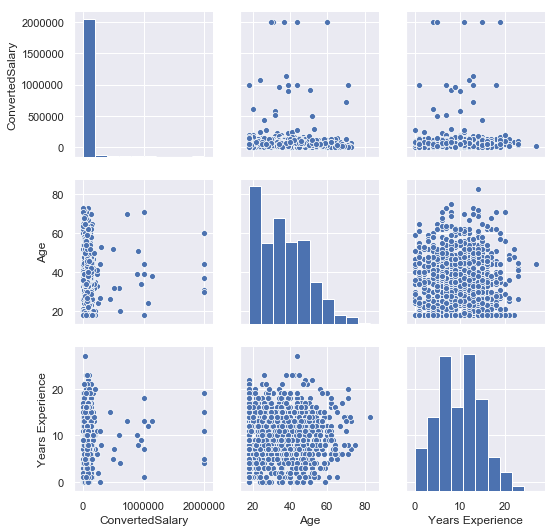

,ConvertedSalary,Age,Years Experience
count,6.650000e+02,999.000000,999.000000
mean,9.256517e+04,36.003003,9.961962
std,2.091344e+05,13.255127,4.878129
min,0.000000e+00,18.000000,0.000000
25%,2.755000e+04,25.000000,7.000000
50%,5.556200e+04,35.000000,10.000000
75%,8.823800e+04,45.000000,13.000000
max,2.000000e+06,83.000000,27.000000


In [29]:
# What does your data look like? (II)

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

# Print summary statistics
so_numeric_df.describe()


Exercício 4

In [30]:
# When don't you have to transform your data?

# While making sure that all of your data is on the same scale is advisable for most analyses, for which of the following
# machine learning models is normalizing data not always necessary?

print("decision trees")

decision trees


#### Exercício 5 - Scaling and transformation

In [31]:
#vídeo

# Scaling data

# Min-Max scaling

# Min-Max scaling in Python
from sklearn.preprocessing import MinMaxScaler   # scaled linearly between a minimum (0) and a maximum value (1)

scaler = MinMaxScaler()

scaler.fit(df[['Age']])

df['normalized_age'] = scaler.transform(df[['Age']])

########################################################################################

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Age']])

df['standardized_col'] = scaler.transform(df[['Age']])

########################################################################################

# Log Transformation
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()

log.fit(df[['ConvertedSalary']])

df['log_ConvertedSalary'] = log.transform(df[['ConvertedSalary']])


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


Exercício 6

In [32]:
# Normalization

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head(7))

print("\nMinMaxScaler: All values have been scaled between 0 and 1")

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39
5  0.323077   39
6  0.246154   34

MinMaxScaler: All values have been scaled between 0 and 1


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Exercício 7

In [33]:
# Standardization

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head(7))

print("\nStandardScaler: The values have been scaled linearly, but not between set values.")

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39
5  0.226214   39
6 -0.151187   34

StandardScaler: The values have been scaled linearly, but not between set values.


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


Exercício 8

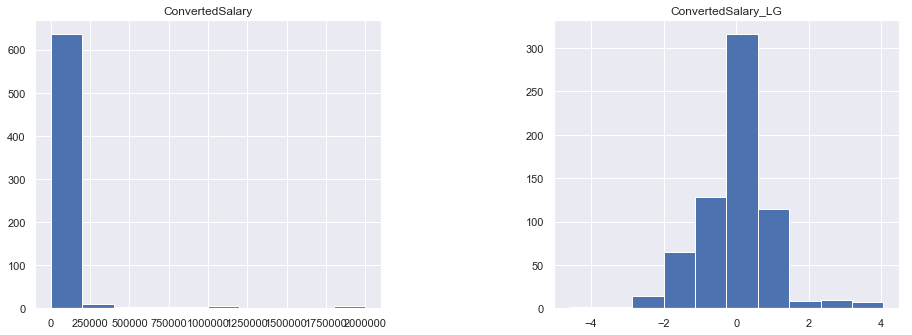

PowerTransformer
notice the change in the shape of the distribution. ConvertedSalary_LG column looks much more normal than the 
original ConvertedSalary column.


In [34]:
# Log transformation

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.5, hspace=0)
plt.show()

print("PowerTransformer")
print("""notice the change in the shape of the distribution. ConvertedSalary_LG column looks much more normal than the 
original ConvertedSalary column.""")

Exercício 9

In [35]:
# When can you use normalization?

# When could you use normalization (MinMaxScaler) when working with a dataset?

print("When you know the the data has a strict upper and lower bound.")


When you know the the data has a strict upper and lower bound.


#### Exercício 10 - Removing outliers

In [36]:
%%script false
#vídeo

# What are outliers?

# Quantile based detection (beyond 95% of the data distribution)
# Quantiles in Python
q_cutoff = df['col_name'].quantile(0.95)

mask = df['col_name'] < q_cutoff

trimmed_df = df[mask]

####################

# Standard deviation based detection (3 standard deviations from the mean)
# Standard deviation detection in Python

mean = df['col_name'].mean()
std = df['col_name'].std()
cut_off = std * 3            # 99%, se for normal

lower, upper = mean - cut_off, mean + cut_off

new_df = df[(df['col_name'] < upper) & (df['col_name'] > lower)]


Couldn't find program: 'false'


Exercício 11

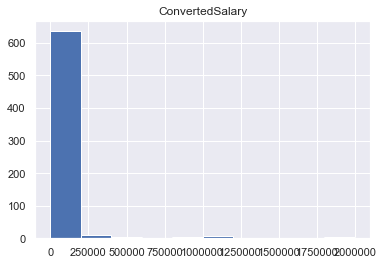

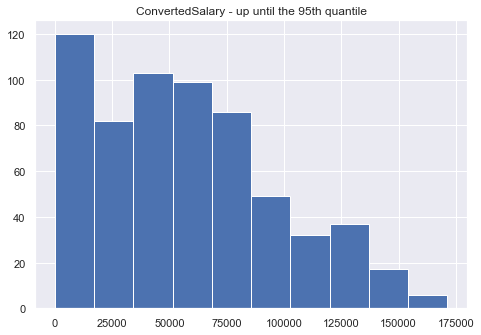

In [37]:
# Percentage based outlier removal

# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.title("ConvertedSalary")
plt.show()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.title("ConvertedSalary - up until the 95th quantile")

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0)
plt.show()

Exercício 12

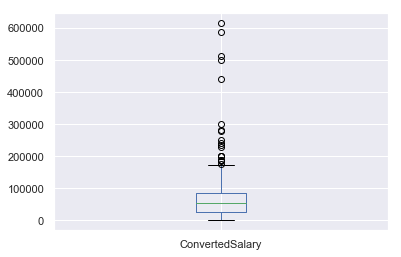

In [38]:
# Statistical outlier removal

# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()


#### Exercício 13 - Scaling and transforming data

In [39]:
%%script false
#vídeo

# Reuse training scalers
scaler = StandardScaler()

scaler.fit(train[['col']])

train['scaled_col'] = scaler.transform(train[['col']])

# FIT SOME MODEL
# ....

test = pd.read_csv('test_csv')
test['scaled_col'] = scaler.transform(test[['col']])

#########

# Training transformations for reuse

train_mean = train[['col']].mean()
train_std = train[['col']].std()
cut_off = train_std * 3
train_lower = train_mean - cut_off
train_upper = train_mean + cut_off

# Subset train data
test = pd.read_csv('test_csv')

# Subset test data
test = test[(test[['col']] < train_upper) & (test[['col']] > train_lower)]

############################

# Why only use training data?
#  - Data leakage: Using data that you won't have access to when assessing the performance of your model


# Avoid data leakage

Couldn't find program: 'false'


Exercício 14

In [40]:
# Train and testing transformations (I)

# So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. 
# When creating machine learning models you will generally build your models on historic data (train set) and apply your 
# model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both
# the training and test data.
# To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set.
# ---> You should never retrain a scaler on the test set.

#####################

# For this exercise and the next, we split the so_numeric_df DataFrame into train (so_train_numeric) and test 
# (so_test_numeric) sets.

so_train_numeric = so_numeric_df.drop(['Age_MM', 'Age_SS', 'ConvertedSalary_LG'], axis=1)[:700].astype(float)
so_test_numeric = so_numeric_df.drop(['Age_MM', 'Age_SS', 'ConvertedSalary_LG'], axis=1)[700:].astype(float)

#####################

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']]) 

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])  
so_test_numeric[['Age', 'Age_ss']].head()


,Age,Age_ss
700,35.0,-0.069265
701,18.0,-1.343218
702,47.0,0.829997
703,57.0,1.579381
704,41.0,0.380366


In [41]:
print("Data leakage is one of the most common mistakes data scientists tend to make, and I hope that you won't")

Data leakage is one of the most common mistakes data scientists tend to make, and I hope that you won't


Exercício 15

In [42]:
# Train and testing transformations (II)

train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) 
                             &
                             (so_test_numeric['ConvertedSalary'] > train_lower)]

trimmed_df.head()

,ConvertedSalary,Age,Years Experience,Age_ss
700,36716.0,35.0,13.0,-0.069265
701,200000.0,18.0,20.0,-1.343218
703,10476.0,57.0,19.0,1.579381
707,42672.0,29.0,9.0,-0.518895
708,23614.0,46.0,15.0,0.755058


# Chapter 4 - Dealing with Text Data

#### Exercício 1 - Encoding text

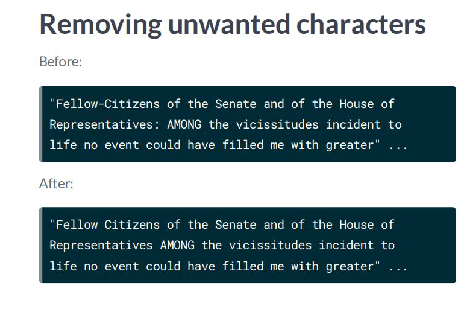

0    1432
1     135
2    2323
3    1736
4    2169
Name: word_counts, dtype: int64

In [43]:
#vídeo

# Standardizing your text
# Example of free text:
# Fellow-Citizens ofthe Senate and of the House of Representatives:
# AMONG the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the 
# notication was transmitted by your order, and received on the th day of the present month.

speech_df = pd.read_csv(data_folder + "inaugural_speeches.csv")

# Dataset
speech_df.head()

# Removing unwanted characters
#  - [a-zA-Z] : All letter characters
#  - [^a-zA-Z] : All non letter characters

speech_df['text'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

image = plt.imread(data_folder + "removing_unwanted_characters.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1, top=1, wspace=0, hspace=0)
plt.show()


# Standardize the case
speech_df['text'] = speech_df['text'].str.lower()
speech_df['text'][0] # fica tudo com letras minúsculas

# Length of text
speech_df['char_cnt'] = speech_df['text'].str.len()
speech_df['char_cnt'].head()

# Word counts
speech_df['word_cnt'] = speech_df['text'].str.split()
speech_df['word_cnt'].head(1)

speech_df['word_counts'] = speech_df['text'].str.split().str.len()
speech_df['word_counts'].head()

##############

# Average length of word
# speech_df['avg_word_len'] = speech_df['char_cnt'] / speech_df['word_cnt']



Exercício 2

In [44]:
# Cleaning up your text

# Print the first 5 rows of the text column (speech_df --> inaugural speeches of the presidents of the United States)
print(speech_df['text'].head(), "\n")

# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())


0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text, dtype: object 

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


Exercício 3

In [45]:
# High level text features

# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

###########################################################################################

# Print the first 5 rows of these columns
speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head()


,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363


#### Exercício 4 - Word counts

In [46]:
#vídeo

# Text to columns

# Initializing the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
print(cv, "\n")


# Specifying the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.1, max_df=0.9)

# min_df : minimum fraction of documents the **word** must occur in
# max_df : maximum fraction of documents the **word** can occur in

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Transforming your text
cv_transformed = cv.transform(speech_df['text_clean'])   # <58x1930 sparse matrix of type '<class 'numpy.int64'>'
cv_transformed

# cv_transformed.toarray()    ou    print(cv_transformed)


# Getting the features
feature_names = cv.get_feature_names()
print(feature_names[:5], "...\n")


# Fitting and transforming   (de uma vez só)
cv_transformed = cv.fit_transform(speech_df['text_clean'])  # <58x8839 sparse matrix of type '<type 'numpy.int64'>'
cv_transformed

####################################################################################

# Putting it all together
cv_df = pd.DataFrame(cv_transformed.toarray(), columns=cv.get_feature_names()).add_prefix('Counts_')

# Updating your DataFrame
speech_df = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df.shape)

cv_df.head()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None) 

['abandon', 'abiding', 'ability', 'able', 'about'] ...

(58, 1939)


,Counts_abandon,Counts_abiding,Counts_ability,Counts_able,Counts_about,Counts_above,Counts_abroad,Counts_absolute,Counts_abuse,Counts_abuses,...,Counts_year,Counts_years,Counts_yes,Counts_yet,Counts_yield,Counts_you,Counts_young,Counts_your,Counts_zeal,Counts_zealously
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,5,0,9,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,1,...,2,3,0,0,0,0,0,1,1,0
3,1,0,0,0,1,1,1,1,0,2,...,0,0,0,2,0,7,0,7,1,0
4,0,0,0,1,0,0,0,0,0,2,...,2,2,0,2,0,4,0,4,3,0


Exercício 5

In [47]:
# Counting words (I)

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print("First 100 feature names:\n \n", cv.get_feature_names()[:100], "...")

# this vectorizer can be applied to both the text it was trained on, and new texts.

First 100 feature names:
 
 ['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 

Exercício 6

In [48]:
# Counting words (II)

# Once the vectorizer has been fit to the data, it can be used to transform the text to an array representing the word 
# counts. This array will have a row per block of text and a column for each of the features generated by the vectorizer 
# that you observed in the last exercise.


# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array, "\n")


# Print the shape of cv_array
print(cv_array.shape)
print("The speeches have 9043 unique words")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

(58, 9043)
The speeches have 9043 unique words


Exercício 7

In [49]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)
print("the number of features (unique words) greatly reduced from 9043 to 818 with the setting of min_df and max_df")

(58, 818)
the number of features (unique words) greatly reduced from 9043 to 818 with the setting of min_df and max_df


Exercício 8

In [50]:
# Text to DataFrame

# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)

print("With the new features combined with the orginial DataFrame they can be now used for ML models or analysis:")

speech_df_new.head(3)

With the new features combined with the orginial DataFrame they can be now used for ML models or analysis:


,Name,Inaugural Address,Date,text,char_cnt,word_cnt,word_counts,text_clean,avg_word_length,Counts_abandon,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,8616,1432,1432,fellow citizens of the senate and of the house...,6.016760,0,...,0,0,0,0,0,1,0,5,0,9
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,787,135,135,fellow citizens i am again called upon by th...,5.829630,0,...,0,0,0,0,0,0,0,0,0,1
2,John Adams,Inaugural Address,"Saturday, March 4, 1797",when it was first perceived in early times t...,13871,2323,2323,when it was first perceived in early times t...,5.971158,0,...,0,0,0,0,2,3,0,0,0,1


#### Exercício 9 - Term frequency-inverse document frequency

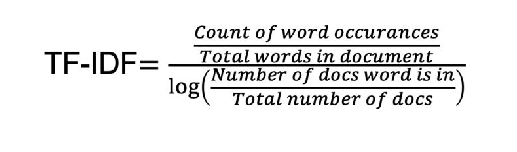

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None) 



,Name,Inaugural Address,Date,text,char_cnt,word_cnt,word_counts,text_clean,avg_word_length,Counts_abandon,...,TFIDF_subject,TFIDF_support,TFIDF_time,TFIDF_trust,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_world,TFIDF_years
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.045837,0.076951,0.000000,0.0,0.202108,0.044683,0.000000,0.442467,0.021783
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.084762,0.054585,0.0,0.066787,0.098437,0.118367,0.339047,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.129754,0.000000,0.0,0.027263,0.030138,0.000000,0.415213,0.029385


In [51]:
#vídeo

# Introducing TF-IDF
image = plt.imread(data_folder + "tf_idf.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.4, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# Importing the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
print(tv, "\n")

# Max features and stopwords
tv = TfidfVectorizer(max_features=100, stop_words='english')  # show only the top 100 most common words

# max_features : Maximum number of columns created from TF-IDF
# stop_words : List of common words to omit e.g."and", "the", etc.  ---> tb podemos adicionar as nossas próprias listas

########################################

#definição minha
train_speech_df = speech_df[:40]   
test_speech_df = speech_df[40:]  


# Fitting your text
tv.fit(train_speech_df['text'])

train_tv_transformed = tv.transform(train_speech_df['text'])   # <40x100 sparse matrix of type '<class 'numpy.float64'>'

##################################

# Putting it all together

train_tv_df = pd.DataFrame(train_tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')

train_speech_df = pd.concat([train_speech_df, train_tv_df], axis=1, sort=False)
train_speech_df.head(3)

##########

# Inspecting your transforms
examine_row = train_tv_df.iloc[0]
examine_row.sort_values(ascending=False)   # vê as palavas mais frequentes, por ordem

#########

# Applying the vectorizer to new data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')

test_speech_df = pd.concat([test_speech_df, test_tv_df], axis=1, sort=False)

test_speech_df.head(3)

Exercício 10

In [52]:
# Tf-idf

# While counts of occurrences of words can be useful to build models, words that occur many times may skew the results
# undesirably. To limit these common words from overpowering your model a form of normalization can be used. In this lesson
# you will be using Term frequency-inverse document frequency (Tf-idf) as was discussed in the video. Tf-idf has the effect
# of reducing the value of common words, while increasing the weight of words that do not occur in many documents.

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectorizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')

print("""notice that counting the word occurences and calculating the Tf-idf weights are very similar? This is one of the
reasons scikit-learn is very popular, a consistent API.""")

tv_df.head()


notice that counting the word occurences and calculating the Tf-idf weights are very similar? This is one of the
reasons scikit-learn is very popular, a consistent API.


,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817


Exercício 11

In [53]:
# Inspecting Tf-idf values

# After creating Tf-idf features you will often want to understand what are the most highest scored words for each corpus.
# This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.

# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

print("\nthe scores make sense for the corresponding words. São discursos de tomada de posse de presidentes.")

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64

the scores make sense for the corresponding words. São discursos de tomada de posse de presidentes.


Exercício 12

In [54]:
# Transforming unseen data

# When creating vectors from text, any transformations that you perform before training a machine learning model, you also
# need to apply on the new unseen (test) data. To achieve this follow the same approach from the last chapter: fit the 
# vectorizer only on the training data, and apply it to the test data.

train_speech_df = speech_df[:45]
test_speech_df = speech_df[45:]

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')

test_tv_df.head()


,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_authority,TFIDF_best,TFIDF_business,TFIDF_citizens,TFIDF_commerce,TFIDF_common,...,TFIDF_subject,TFIDF_support,TFIDF_time,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.029540,0.233954,0.082703,0.000000,0.000000,0.000000,0.022577,0.0,0.000000,...,0.0,0.000000,0.115378,0.000000,0.024648,0.079050,0.033313,0.000000,0.299983,0.134749
1,0.000000,0.000000,0.547457,0.036862,0.000000,0.036036,0.000000,0.015094,0.0,0.000000,...,0.0,0.019296,0.092567,0.000000,0.000000,0.052851,0.066817,0.078999,0.277701,0.126126
2,0.000000,0.000000,0.126987,0.134669,0.000000,0.131652,0.000000,0.000000,0.0,0.046997,...,0.0,0.000000,0.075151,0.000000,0.080272,0.042907,0.054245,0.096203,0.225452,0.043884
3,0.037094,0.067428,0.267012,0.031463,0.039990,0.061516,0.050085,0.077301,0.0,0.000000,...,0.0,0.098819,0.210690,0.000000,0.056262,0.030073,0.038020,0.235998,0.237026,0.061516
4,0.000000,0.000000,0.221561,0.156644,0.028442,0.087505,0.000000,0.109959,0.0,0.023428,...,0.0,0.023428,0.187313,0.131913,0.040016,0.021389,0.081124,0.119894,0.299701,0.153133


#### Exercício 13 - N-grams

In [55]:
#vídeo

# Issues with bag of words

# Positive meaning
#  - Single word: happy
# Negative meaning
#  - Bi-gram : not happy
# Positive meaning
#  - Trigram : never not happy

# Using N-grams
tv_bi_gram_vec = TfidfVectorizer(ngram_range = (2,2))

# Fit and apply bigram vectorizer
tv_bi_gram = tv_bi_gram_vec.fit_transform(speech_df['text'])

# Print the bigram features
tv_bi_gram_vec.get_feature_names()

################################

# Finding common words

# Create a DataFrame with the Counts features
tv_df = pd.DataFrame(tv_bi_gram.toarray(), columns=tv_bi_gram_vec.get_feature_names()).add_prefix('Counts_')

tv_sums = tv_df.sum()

print(tv_sums.head(7), "\n")

tv_sums.sort_values(ascending=False).head(8)


Counts_abandon all           0.047565
Counts_abandon government    0.027832
Counts_abandon mastery       0.029715
Counts_abandon our           0.026602
Counts_abandon their         0.022495
Counts_abandon these         0.015440
Counts_abandon they          0.015440
dtype: float64 



Counts_of the     8.223005
Counts_in the     3.998360
Counts_to the     3.503714
Counts_of our     3.117239
Counts_and the    2.364961
Counts_we have    1.772485
Counts_by the     1.663386
Counts_for the    1.649959
dtype: float64

Exercício 14

In [56]:
# Using longer n-grams

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())


['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home', 'ask bow heads', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'distinction powers granted', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greates

Exercício 15

In [57]:
# Finding the most common words

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print("the most common trigram is constitution united states makes a lot of sense for US presidents speeches.")

cv_tri_df.sum().sort_values(ascending=False).head()


the most common trigram is constitution united states makes a lot of sense for US presidents speeches.


Counts_constitution united states    20
Counts_people united states          13
Counts_preserve protect defend       10
Counts_mr chief justice              10
Counts_president united states        8
dtype: int64

#### Exercício 16 - Wrap-up

In [58]:
#vídeo

# Fim